In [50]:
import numpy as np
import numpy.matlib as npm
import matplotlib.pyplot as plt


In [51]:
n = 50
N = 1000
x = np.linspace(-3, 3, n).reshape(n,1)
X = np.linspace(-3, 3, N).reshape(N,1)

In [52]:
pix = np.pi*x
y = np.sin(pix)/(pix)+0.1*x+0.2*np.random.randn(n,1) 
y[n//2] = -0.5

In [53]:
hh = 2*0.3**2
l = 0.1
e = 0.1
t0 = np.random.randn(n, 1)
x2 = x**2
k = np.exp(-(npm.repmat(x2,1,n)+npm.repmat(x2.T,n,1)-2*x@x.T)/hh)

In [54]:
for i in range(1, 2001):
    r = np.abs(k @ t0 -y)
    w = np.ones((n, 1))
    w[r>e] = e/r[r>e]
    z=k@(npm.repmat(w,1,n)*k)+l*np.linalg.pinv(np.diag(np.abs(t0).flatten()))
    t=np.linalg.solve((z+0.000001*np.eye(n)),(k @ (w*y)))
    if np.linalg.norm(t-t0)<0.001:
        break
    t0 = t

In [55]:
K = np.exp(-(npm.repmat(X**2,1,n)+npm.repmat(x2.T,N,1)-2*X @ x.T)/hh)
F=K @ t

<function matplotlib.pyplot.show(*args, **kw)>

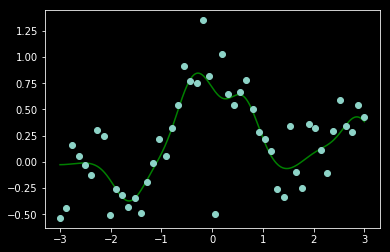

In [56]:
plt.plot(X, F, "g-")
plt.plot(x,y,"o")
plt.show